In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Letter\Letter_NN_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,2.0,4.0,4.0,NaN,2.0,7.0,8.0,2.0,9.0,11.0,7.0,7.0,1.0,8.0,5.0,6.0,NaN
1,4.0,7.0,5.0,5.0,5.0,5.0,9.0,6.0,4.0,8.0,7.0,9.0,2.0,9.0,7.0,10.0,NaN
2,7.0,NaN,8.0,7.0,4.0,8.0,8.0,5.0,10.0,11.0,2.0,8.0,2.0,5.0,5.0,10.0,NaN
3,4.0,9.0,5.0,7.0,4.0,7.0,7.0,13.0,1.0,7.0,6.0,8.0,3.0,8.0,0.0,8.0,NaN
4,6.0,7.0,8.0,5.0,4.0,7.0,6.0,3.0,7.0,10.0,7.0,9.0,3.0,8.0,3.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5.0,10.0,5.0,8.0,3.0,4.0,10.0,7.0,8.0,12.0,10.0,9.0,2.0,9.0,2.0,NaN,NaN
19996,4.0,7.0,6.0,5.0,3.0,7.0,8.0,2.0,10.0,12.0,6.0,8.0,1.0,9.0,6.0,8.0,NaN
19997,4.0,8.0,4.0,6.0,4.0,7.0,8.0,7.0,4.0,10.0,7.0,6.0,3.0,9.0,3.0,7.0,NaN
19998,4.0,11.0,4.0,8.0,3.0,NaN,2.0,4.0,6.0,1.0,0.0,7.0,0.0,8.0,0.0,8.0,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	200
float64		column 2	250
float64		column 3	450
float64		column 4	100
float64		column 5	50
float64		column 6	250
float64		column 7	100
float64		column 8	150
float64		column 9	400
float64		column 10	200
float64		column 11	200
float64		column 12	200
float64		column 13	100
float64		column 14	100
float64		column 15	50
float64		column 16	400
float64		column 17	20000


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
count,19800.000000,19750.000000,19550.000000,19900.000000,19950.000000,19750.000000,19900.000000,19850.000000,19600.000000,19800.000000,19800.000000,19800.000000,19900.000000,19900.000000,19950.000000,19600.000000,0.0
mean,4.019949,7.040456,5.123171,5.372060,3.505514,6.899241,7.499196,4.625743,5.178878,8.283586,6.448030,7.929495,3.044322,8.336784,3.693233,7.800714,NaN
std,1.907253,3.288241,1.997920,2.258478,2.188666,2.017211,2.320613,2.690462,2.367515,2.479480,2.621178,2.069986,2.327467,1.542810,2.564977,1.604556,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.000000,7.000000,1.000000,8.000000,2.000000,7.000000,NaN
50%,4.000000,7.000000,5.000000,6.000000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.000000,8.000000,3.000000,8.000000,3.000000,8.000000,NaN
75%,5.000000,9.000000,6.000000,7.000000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.000000,9.000000,4.000000,9.000000,5.000000,8.000000,NaN
max,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,NaN


<AxesSubplot:>

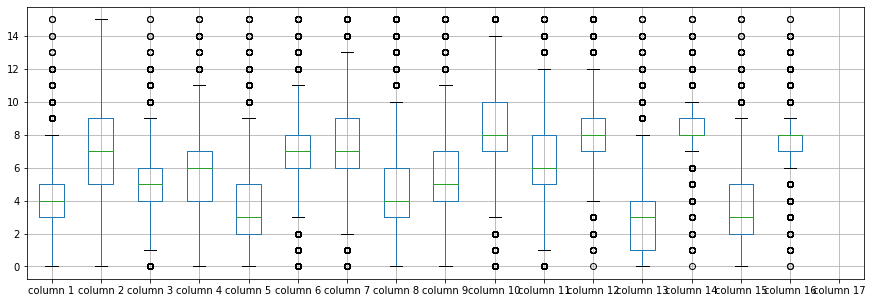

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     4.019949
column 2     7.040456
column 3     5.123171
column 4     5.372060
column 5     3.505514
column 6     6.899241
column 7     7.499196
column 8     4.625743
column 9     5.178878
column 10    8.283586
column 11    6.448030
column 12    7.929495
column 13    3.044322
column 14    8.336784
column 15    3.693233
column 16    7.800714
column 17         NaN
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
column 1,1.000000,0.754724,0.849073,0.670950,0.618324,-0.033284,0.045567,0.015028,0.051934,0.149065,0.036616,-0.044959,0.487316,0.096532,0.273150,-0.100223,NaN
column 2,0.754724,1.000000,0.668044,0.822379,0.553950,0.045359,-0.039382,-0.023445,0.095049,0.156815,-0.053463,-0.006669,0.272488,-0.002414,0.229067,-0.038638,NaN
column 3,0.849073,0.668044,1.000000,0.657066,0.764163,0.061212,0.024810,-0.098157,0.057467,0.114203,0.010987,-0.043605,0.552516,0.042481,0.258766,-0.117406,NaN
column 4,0.670950,0.822379,0.657066,1.000000,0.643645,0.044120,-0.020467,0.082003,0.060638,0.013404,-0.012340,0.027812,0.264051,0.024351,0.295578,-0.016857,NaN
column 5,0.618324,0.553950,0.764163,0.643645,1.000000,0.139073,-0.028454,-0.011924,-0.063845,-0.069672,-0.071882,-0.036236,0.626496,0.016977,0.491601,-0.060832,NaN
column 6,-0.033284,0.045359,0.061212,0.044120,0.139073,1.000000,-0.357820,-0.055244,-0.122727,0.080242,-0.342129,-0.032924,0.144718,-0.251742,0.126304,0.247709,NaN
column 7,0.045567,-0.039382,0.024810,-0.020467,-0.028454,-0.357820,1.000000,-0.117910,-0.048410,0.176732,0.597522,-0.271335,-0.037874,0.553846,-0.078231,-0.207297,NaN
column 8,0.015028,-0.023445,-0.098157,0.082003,-0.011924,-0.055244,-0.117910,1.000000,-0.183802,-0.316920,0.045097,0.080113,0.142074,-0.083650,0.008198,0.180550,NaN
column 9,0.051934,0.095049,0.057467,0.060638,-0.063845,-0.122727,-0.048410,-0.183802,1.000000,0.133129,-0.057890,0.116176,-0.381977,-0.050144,0.277110,-0.060458,NaN
column 10,0.149065,0.156815,0.114203,0.013404,-0.069672,0.080242,0.176732,-0.316920,0.133129,1.000000,0.056670,-0.104517,-0.176691,0.029430,-0.088553,-0.113460,NaN


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [17,17+2,17+2+2,17+2+2+2,17+2+2,17+2,17], vae_layer = False, seed = 20)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [17]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 78.88808341064453
Epoch: 1 , loss: 50.91904781494141
Epoch: 2 , loss: 46.32331470031738
Epoch: 3 , loss: 44.48291383972168
Epoch: 4 , loss: 43.47906566162109
Epoch: 5 , loss: 42.54930257873535
Epoch: 6 , loss: 42.24381783447266
Epoch: 7 , loss: 42.16086763305664
Epoch: 8 , loss: 41.857890396118165
Epoch: 9 , loss: 41.70417305297852
Epoch: 10 , loss: 41.565824813842774
Epoch: 11 , loss: 41.508236828613285
Epoch: 12 , loss: 41.27596073303223
Epoch: 13 , loss: 41.156570861816405
Epoch: 14 , loss: 41.07787011413574
Epoch: 15 , loss: 41.07927643737793
Epoch: 16 , loss: 41.07076516418457
Epoch: 17 , loss: 40.9417484375
Epoch: 18 , loss: 40.87675985717773
Epoch: 19 , loss: 40.87839587097168
Epoch: 20 , loss: 40.86735023651123
Epoch: 21 , loss: 40.80838444519043
Epoch: 22 , loss: 40.73976767730713
Epoch: 23 , loss: 40.56765158081055
Epoch: 24 , loss: 40.623945567321776
Epoch: 25 , loss: 40.36032390441895
Epoch

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(20000, 17)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     3.000000
column 2     7.000000
column 3     3.000000
column 4     5.000000
column 5     1.000000
column 6     1.000000
column 7     1.000000
column 8     5.000000
column 9     5.000000
column 10    0.000000
column 11    1.000000
column 12    6.000000
column 13    0.000000
column 14    8.000000
column 15    0.000000
column 16    8.000000
column 17   -0.002668
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Letter.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,0.0,0.00000,0.0,2.18971,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN
1,0.0,0.00000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN
2,0.0,-6.23743,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN
3,0.0,0.00000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN
4,0.0,0.00000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0,0.00000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.900072,NaN
19996,0.0,0.00000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN
19997,0.0,0.00000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN
19998,0.0,0.00000,0.0,0.00000,0.0,7.712262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

179.67258545709203

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

3733.8164121981144

In [18]:
NRMS=numerator/denominator
NRMS


0.04812035880235418

In [19]:
new_df.iloc[66,:]

column 1      6.000000
column 2      9.000000
column 3     10.000000
column 4      7.000000
column 5     11.000000
column 6     10.000000
column 7      5.000000
column 8      3.000000
column 9      2.000000
column 10     9.000000
column 11     4.000000
column 12     8.000000
column 13    11.000000
column 14     6.000000
column 15     4.000000
column 16     7.000000
column 17    -0.000547
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,2.0,4.00000,4.0,5.18971,2.0,7.000000,8.0,2.0,9.0,11.0,7.0,7.0,1.0,8.0,5.0,6.000000,-0.004014
1,4.0,7.00000,5.0,5.00000,5.0,5.000000,9.0,6.0,4.0,8.0,7.0,9.0,2.0,9.0,7.0,10.000000,-0.003419
2,7.0,3.76257,8.0,7.00000,4.0,8.000000,8.0,5.0,10.0,11.0,2.0,8.0,2.0,5.0,5.0,10.000000,-0.001642
3,4.0,9.00000,5.0,7.00000,4.0,7.000000,7.0,13.0,1.0,7.0,6.0,8.0,3.0,8.0,0.0,8.000000,-0.003307
4,6.0,7.00000,8.0,5.00000,4.0,7.000000,6.0,3.0,7.0,10.0,7.0,9.0,3.0,8.0,3.0,7.000000,-0.004586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5.0,10.00000,5.0,8.00000,3.0,4.000000,10.0,7.0,8.0,12.0,10.0,9.0,2.0,9.0,2.0,9.900072,-0.004292
19996,4.0,7.00000,6.0,5.00000,3.0,7.000000,8.0,2.0,10.0,12.0,6.0,8.0,1.0,9.0,6.0,8.000000,-0.001928
19997,4.0,8.00000,4.0,6.00000,4.0,7.000000,8.0,7.0,4.0,10.0,7.0,6.0,3.0,9.0,3.0,7.000000,-0.001338
19998,4.0,11.00000,4.0,8.00000,3.0,7.712262,2.0,4.0,6.0,1.0,0.0,7.0,0.0,8.0,0.0,8.000000,-0.003268


In [21]:
imputations[-1].to_excel("Letter_NN_1(imp).xlsx", index=False, header=False)